<a href="https://colab.research.google.com/github/gustavor10silva/regressao_polinomial/blob/main/regressao_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introdução

Este notebook aborda o assunto da Regressão Polinomial. Ou seja, quando queremos prever um valor numérico para uma variável $y$ com base em variáveis preditoras $X$ usando um polinômio.

Veremos o problema do ponto de vista da otimização, um exemplo de aplicação de regressão polinomial simples e um exemplo de aplicação da regressão polinomial múltipla.

Além disso, veremos o que é a regularização e como utilizá-la em conjunto com a regressão polinomial.

# 2 O problema da regressão polinomial

Para entendermos a parte técnica da regressão polinomial, a referência utilizada será este [vídeo](https://www.youtube.com/watch?v=G6yGrsjMxls&ab_channel=AbelSiqueira).

Considere um problema onde temos as variáveis preditoras $x_i$ e a variável resposta $y_i$, que é um valor numérico que depende das variáveis preditoras.

O que queremos com a regressão polinomial é calcular $\hat{y_i}$, que é uma aproximação para $y_i$, onde:

$$\beta_0 + \beta_1x_i + \beta_2x_i^2 + \ldots + \beta_px_i^p = \hat{y_i}$$

Como estamos fazendo uma aproximação para $y_i$, ou seja, $\hat{y_i} \approx y_i$, estamos cometendo um erro $r_i$:

$$\begin{align}
             & r_i = \left| y_i - \hat{y_i} \right|\\
\Rightarrow\ & r_i = \left| y_i - \beta_0 - \beta_1x_i - \beta_2x_i^2 - \ldots - \beta_px_i^p \right|\\
\Rightarrow\ & r_i = \left| y_i - \sum_{j=0}^n \beta_jx_i^j \right|
\end{align}$$

Queremos minimizar esse erro $r_i$, mas como é difícil trabalhar com a derivada de uma função com módulo, é conveniente reescrevermos esse problema como o problema de quadrados mínimos, onde queremos minimizar a seguinte expressão:

$$\dfrac{1}{2}\sum_{i=1}^n\left(y_i - \sum_{j=0}^n \beta_jx_i^j\right)^2$$

Obs.: o $\dfrac{1}{2}$ multiplicando a expressão serve apenas para cancelar com o $2$ que desce do expoente ao derivar.

Matricialmente, queremos minimizar:

$$\dfrac{1}{2}||y - X\beta||^2,$$

onde:

$$X = 
\begin{bmatrix}
1 & x_1 & x_1^2 & \ldots & x_1^p\\
1 & x_2 & x_2^2 & \ldots & x_2^p\\
1 & x_3 & x_3^2 & \ldots & x_3^p\\
\vdots & \vdots & \vdots & & \vdots\\
1 & x_n & x_n^2 & \ldots & x_n^p\\
\end{bmatrix}
\mbox{, }
\beta =
\begin{bmatrix}
\beta_0 & \beta_1 & \beta_2 & \ldots & \beta_p
\end{bmatrix}$$

O valor de $\hat{\beta}$ que minimiza a expressão matricial acima será:

$$\hat{\beta} = \left(X^TX\right)^{-1}X^Ty$$

E portanto o valor estimado $\hat{y}$ será:

$$\hat{y} = X\hat{\beta}$$

# 3 Regressão polinomial simples

Vejamos um exemplo de aplicação da regressão polinomial simples, que servirá de base para prosseguirmos para o caso múltiplo.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn

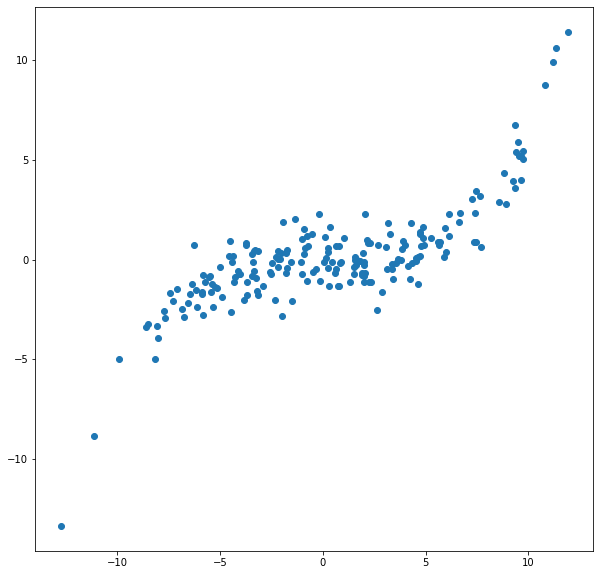

In [ ]:
plt.rcParams['figure.figsize'] = [10,10]
np.random.seed(0)
X = np.random.randn(200, 1)*5 # o n vem de normal
X = np.sort(X, axis=0) # aqui estou somente ordenando os valores de X de forma crescente para não termos problemas ao usar plt.plot
var = np.random.randn(200, 1)
y = (X**3)/160 + var
plt.scatter(X, y)

Podemos tentar usar uma regressão linear para encontrar uma reta que descreve esses pontos. Nesse caso, teremos:

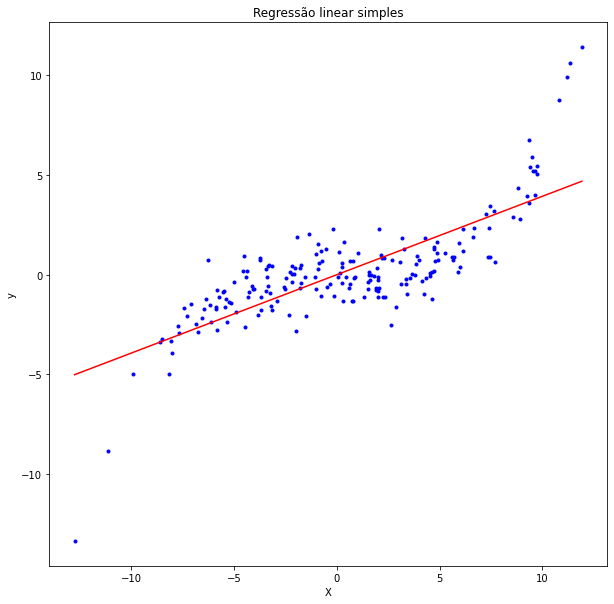

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # instanciando a regressão linear
lin_reg.fit(X, y) # treinando a regressão com os dados de X e y

y_pred = lin_reg.predict(X) # calculando as ordenadas (y) para as abcissas de X (x)

plt.title('Regressão linear simples')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r-')
plt.show()

Note que a reta descreve de forma grosseira o nosso conjunto de dados. Vejamos qual foi o erro quadrático médio:

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

2.529162738055417

Agora, vejamos como a regressão polinomial se comporta nesse caso. Comecemos com um polinômio de grau $p=2$:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pre_process2 = PolynomialFeatures(degree=2) # instanciando a regressão polinomial

X_poly2 = pre_process2.fit_transform(X)
X_poly2

array([[ 1.00000000e+00, -1.27649491e+01,  1.62943925e+02],
       [ 1.00000000e+00, -1.11170158e+01,  1.23588039e+02],
       [ 1.00000000e+00, -9.90398234e+00,  9.80888662e+01],
       [ 1.00000000e+00, -8.63141301e+00,  7.45012906e+01],
       [ 1.00000000e+00, -8.53135095e+00,  7.27839491e+01],
       [ 1.00000000e+00, -8.15099173e+00,  6.64386663e+01],
       [ 1.00000000e+00, -8.06948924e+00,  6.51166566e+01],
       [ 1.00000000e+00, -8.01028828e+00,  6.41647183e+01],
       [ 1.00000000e+00, -7.72385548e+00,  5.96579435e+01],
       [ 1.00000000e+00, -7.68121843e+00,  5.90011166e+01],
       [ 1.00000000e+00, -7.45628796e+00,  5.55962302e+01],
       [ 1.00000000e+00, -7.27182837e+00,  5.28794879e+01],
       [ 1.00000000e+00, -7.10008969e+00,  5.04112735e+01],
       [ 1.00000000e+00, -6.87475647e+00,  4.72622765e+01],
       [ 1.00000000e+00, -6.73879531e+00,  4.54113622e+01],
       [ 1.00000000e+00, -6.57953705e+00,  4.32903078e+01],
       [ 1.00000000e+00, -6.46428455e+00

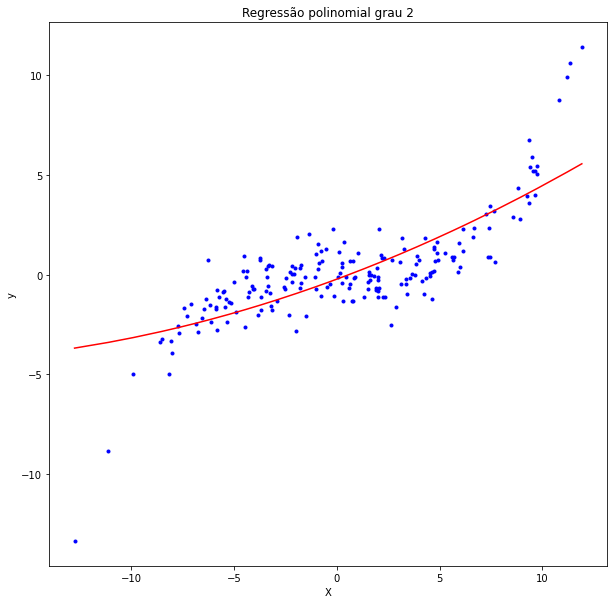

In [ ]:
model = LinearRegression()
model.fit(X_poly2, y)
y_pred2 = model.predict(X_poly2)

plt.title('Regressão polinomial grau 2')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.plot(X, y_pred2, 'r-')
plt.show()

Note que esse polinômio ainda descreve mal o conjunto de dados. Vejamos o erro quadrático médio:

In [ ]:
mean_squared_error(y, y_pred2)

2.663415128744755

Agora, vejamos regressões polinomiais com graus 3, 4 e 5:

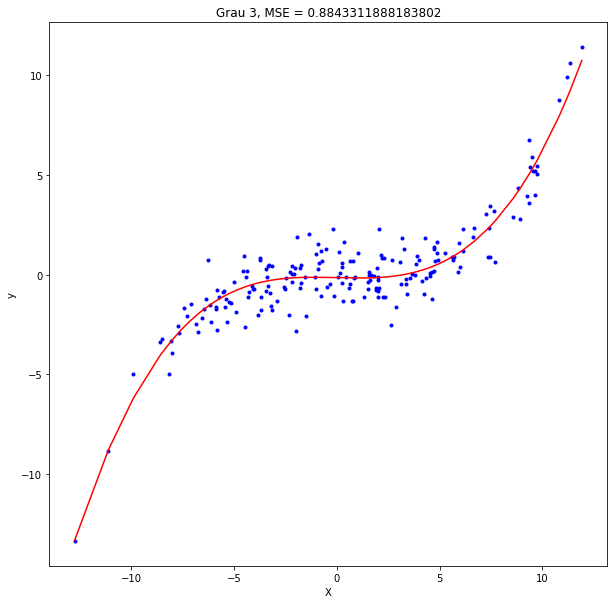

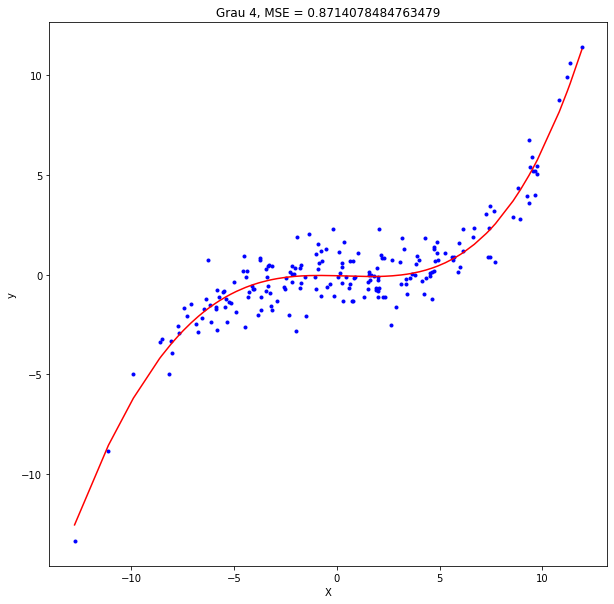

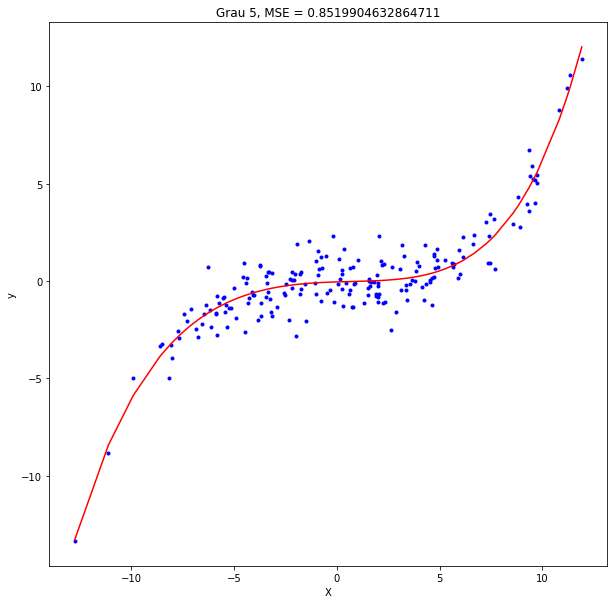

In [ ]:
plt.rcParams['figure.figsize'] = [10,10] # aqui estamos definindo as dimensões das imagens que serão plotadas
#scores_kmeans = [] # esse é o vetor onde guardaremos os scores do coeficiente de silhueta

# nc será o número de clusters; nc percorrerá os valores 2, 3, 4, 5, 6 e 7
for degree in [3,4,5]:

    pre_process = PolynomialFeatures(degree=degree) # instanciando a regressão linear
    X_poly = pre_process.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    plt.title('Grau {}, MSE = {}'.format(degree, mean_squared_error(y, y_pred)))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot(X, y, 'b.')
    plt.plot(X, y_pred, 'r-')
    plt.show()

Note que com polinômios de grau 3, 4 e 5, o resultado foi bastante satisfatório. Isso faz sentido, porque o conjunto de pontos foi gerado justamente com base em uma função de grau 3.

Podemos perceber que, à medida que aumentamos o grau do polinômio, o erro quadrático médio (MSE) diminui.

Em geral, queremos um polinômio de menor grau que descreve bem o conjunto de dados. Isso ocorre porque, embora o MSE reduz à medida que aumentamos o grau, o overfitting aumenta, e não queremos isso.

# 4 Regressão polinomial múltipla

Para uma aplicação mais completa, com a regressão polinomial múltipla, usaremos o dataset [Diamonds](https://www.kaggle.com/datasets/shivam2503/diamonds?resource=download).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portfólio Ciência de Dados/Supervisionado/Regressão/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Antes de tudo, vamos dividir esse dataset entre treino e teste, separando as variáveis preditoras (X) da variável resposta (y), que é o preço:

In [ ]:
X = df.drop(columns=['Unnamed: 0', 'price']) # X terá todas as colunas de df, exceto 'Unnamed: 0' e 'price'
y = df['price'] # y será a coluna 'price'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # o conjunto de teste terá 33% dos dados

Agora, vejamos os tipos de valores que temos em cada coluna:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Note que temos 3 variáveis categóricas: `carat`, `cut` e `color`. Precisamos transformar essas variáveis em numéricas para que a regressão polinomial consiga trabalhar com elas.

Vamos investigar um pouco mais sobre a natureza desses dados categóricos:

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

De acordo com a descrição do dataset no Kaggle, temos:

* **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* **color:** diamond colour, from J (worst) to D (best)

* **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

Existem várias formas de transformar variáveis categóricas para numéricas. Pode-se estudá-las na documentação do [Category Encoders](https://contrib.scikit-learn.org/category_encoders/).

No nosso caso, como vimos logo acima que cada uma dessas variáveis **possui uma ordem** (do pior para o melhor), a melhor opção para transformarmos essas variáveis em numéricas é usando o [OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).

In [ ]:
pip install category_encoders

In [ ]:
from category_encoders.ordinal import OrdinalEncoder
enc = OrdinalEncoder(cols=['cut', 'color', 'clarity'])
enc.fit(X_train)

X_train_ord = enc.transform(X_train)
X_test_ord = enc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train_ord.head()

,carat,cut,color,clarity,depth,table,x,y,z
241,1.01,1,1,1,64.5,58.0,6.29,6.21,4.03
17398,0.32,2,2,2,61.4,57.0,4.41,4.38,2.70
36608,0.34,3,1,3,62.5,59.0,4.43,4.46,2.78
44731,0.56,2,3,4,61.8,55.0,5.30,5.34,3.29
18104,1.02,2,2,4,61.0,57.0,6.48,6.50,3.96


Agora, vamos encontrar o melhor modelo usando o GridSearchCV:

In [ ]:
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(20),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'polynomialfeatures__degree': [2,3,4,5], #np.arange(10),
          'linearregression__fit_intercept': [True, False],
          'linearregression__normalize': [True, False]}

grid = GridSearchCV(
       PolynomialRegression(),
       params,
       verbose = 3,
       cv = 5,
       n_jobs = -1
)

gs_results = grid.fit(X_train_ord, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
gs_results.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 2}

In [ ]:
best_model = PolynomialRegression(degree=2, fit_intercept= False, normalize= True)
best_model.fit(X_train_ord, y_train)
y_pred = best_model.predict(X_test_ord)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
mean_squared_error(y_test, y_pred)

2473017.0638093455

# 5 Usando um encoding ordinal manual

Na seção anterior, utilizamos o OrdinalEcoder para substituir nossas variáveis categóricas para numéricas. Porém, como conhecemos exatamente qual é a ordem dos nossos dados categóricos, será que obtemos melhores resultados fazendo essa substituição manualmente? Vejamos:

# 6 Regressão polinomial com regularização

Este [vídeo](https://www.youtube.com/watch?v=QXy5GTb7pwE&ab_channel=AbelSiqueira) possui uma ótima explicação sobre o que é a regularização, tanto do ponto de vista matricial, quanto do olhar da otimização, trazendo as regularizações Ridge (L2) e Lasso (L1), além de mostrar na prática a diferença que faz a regularização em um modelo de regressão polinomial múltipla. O vídeo também aborda o impacto da regularização no overfitting ou underfitting do modelo e será a nossa base para o estudo neste notebook.

Este [artigo](https://www.deeplearningbook.com.br/overfitting-e-regularizacao-parte-2/) é uma referência adicional sobre o que é a regularização e como ela ajuda a reduzir o overfitting dos modelos sem que precisemos reduzir a complexidade deles.



## 6.1 O que é a regularização?

A regularização é uma técnica utilizada para melhorar a performance de modelos que dependem de otimização, como é o caso da regressão, das redes neurais etc.

Como vimos anteriormente, na regressão polinomial múltipla, o problema de otimização é minimizar a seguinte expressão:

$$\dfrac{1}{2}\sum_{i=1}^n\left(y_i - \sum_{j=0}^n \beta_jx_i^j\right)^2$$

Com a regularização, a única diferença é que passamos a minimizar essa expressão acrescida de um termo adicional. Esse termo adicional pode ser $\dfrac{1}{2}\lambda||\beta||^2$, como segue:

$$\dfrac{1}{2}\sum_{i=1}^n\left[ \left(y_i - \sum_{j=0}^n \beta_jx_i^j\right)^2 + \dfrac{1}{2}\lambda||\beta_i||^2\right]$$

Nesse caso, temos a Regularização Ridge (L2), mas veremos a seguir que temos outros tipos de regularização.

## 6.2 Para que serve a regularização?



### 6.2.1 Reduzir o overfitting do modelo

Conforme diminuímos $\lambda$, estamos cada vez mais próximos da otimização sem regularização, que minimiza a soma dos quadrados dos erros. À medida que aumentamos $\lambda$, para minimizarmos a nova expressão, será necessário minimizar também os $\beta_i$, isso deixa o nosso polinômio mais "suave", com menos sobreajuste aos dados de treino, ou seja, reduz o overfitting.

Obs.: se aumentamos muito o $\lambda$, a soma dos quadrados dos erros (SQE) passa a ser irrelevante em comparação ao tamanho da expressão da regularização, então a minimização acima deixa de minimizar o SQE E passa a minimizar demais os $\beta_i$. Isso aproxima o nosso polinômio ao polinômio nulo e o modelo fica horrível.

Vejamos com ilustrações (as imagens abaixo são screenshots do [vídeo do Profº Abel Siqueira sobre regularização](https://www.youtube.com/watch?v=QXy5GTb7pwE&ab_channel=AbelSiqueira)).

Regressão polinomial simples em overfitting (sem regularização):

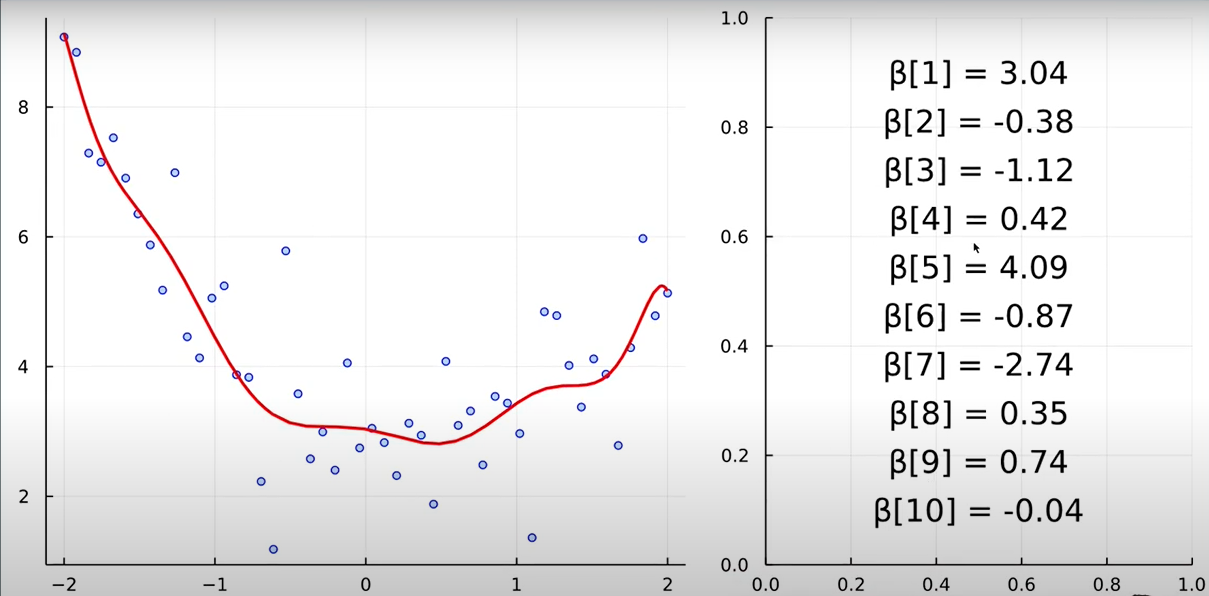

Adicionando a regularização com $\lambda$ na medida certa os $\beta_i$ são reduzidos e o overfitting também:

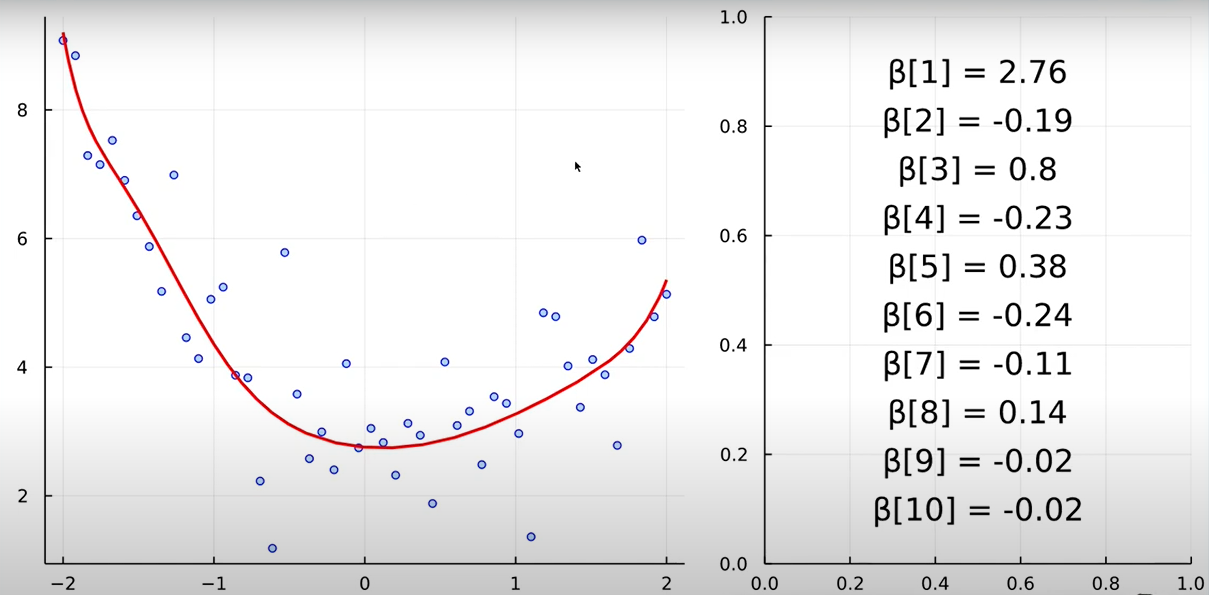

Porém, se aumentamos muito o valor de $\lambda$, os $\beta_i$ são reduzidos exageradamente, o polinômio da regressão é aproximado do polinômio nulo e o modelo deixa de fazer sentido:

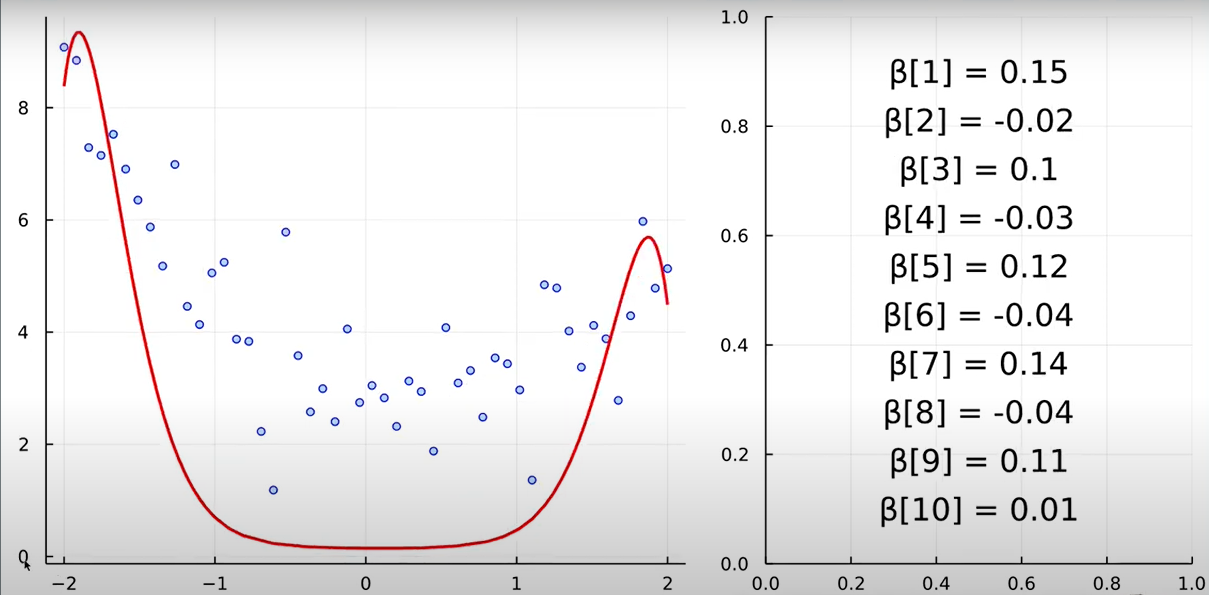

## 6.3 Regularização Ridge (L2)

A regularização Ridge (L2), é justamente o caso visto logo acima, quando adicionamos $\dfrac{1}{2}\lambda||\beta||^2$ na expressão que estamos minimizando.

Para implementar, usamos a documentação de [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).

## 6.4 Regularização Lasso (L1)

A regularização Lasso (L1) ocorre quando adicionamos o termo $\dfrac{1}{2}\lambda||\beta||_1$ à expressão que estamos minimizando (aqui estamos utilizando a norma 1). Para implementar, usamos a documentação [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

## 6.5 Regularização Elastic Net

A regularização Elastic Net é uma combinação entre as regularizações Ridge (L2) e Lasso (L1), com um parâmetro alfa que serve para dizermos o quanto queremos usar de cada uma dessas duas regularizações.

Na regularização Elastic Net, a intenção é minimizarmos a seguinte expressão:

$$\dfrac{1}{2}\sum_{i=1}^n\left[ \left(y_i - \sum_{j=0}^n \beta_jx_i^j\right)^2 + \lambda\left(\left(1 - \alpha\right)||\beta_i||_2^2 + \alpha||\beta_i||_1\right)\right]$$

Note que com $\alpha = 0$, estamos usando somente a regularização Ridge (L2) e, com $\alpha = 1$, estamos usando somente a regularização Lasso (L1). Por outro lado, quando temos $0 < \alpha < 1$, estamos ponderando entre as duas regularizações, usando um pouco de cada uma.

# 7 Próximos passos mapeados

* Overfittar o exemplo de regressão polinomial simples para mostrar o que acontece
* Explicar porque o $\beta_0$ não entra na regularização e corrigir isso
* Tomar cuidado com $\dfrac{1}{2}$ multiplicando tudo e ver se, de fato, essa constante existe